In [1]:

import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import os
import os.path as osp 
import json
from tqdm import tqdm
import random

%cd ..  
from datasets.bases import read_image
from utils.metrics import *
from analyse import *
import umap
from matplotlib.patches import Patch

/export/livia/home/vision/Rbhattacharya/work/reid_sandbox/CLIP-ReID


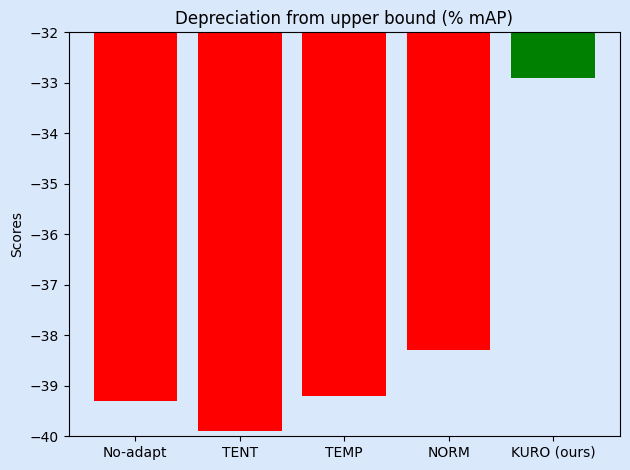

In [17]:
method_names = ['No-adapt', 'TENT', 'TEMP', 'NORM', 'KURO (ours)']
# scores_1 = [-12.2, -12.5, -11.9, -11.1, -8.3]
scores_1 = [-39.3, -39.9, -39.2, -38.3, -32.9]

# Color setup: red for all, green for 'KURO'
bar_colors = ['green' if name == 'KURO (ours)' else 'red' for name in method_names]

# Plot
fig, ax = plt.subplots()
fig.patch.set_facecolor('#DAE8FC')  # Set figure background
ax.set_facecolor('#DAE8FC')         # Set axes background

# Bar plot
ax.bar(method_names, scores_1, color=bar_colors)

# Axis formatting
ax.axhline(0, color='black', linewidth=0.8)
ax.set_ylabel('Scores')
ax.set_title('Depreciation from upper bound (% mAP)')
# plt.ylim(-13, -7)
plt.ylim(-40, -32)

plt.tight_layout()
plt.show()

In [62]:
print("Loading data!")
output_dir = "/export/livia/home/vision/Rbhattacharya/work/reid_sandbox/CLIP-ReID/outputs/downloaded_models/msmt_duke"
feature_type = "og" #"og"#"tent2"
distmat = torch.load(osp.join(output_dir, f"distmat_{feature_type}.pth"))
pids = torch.load(osp.join(output_dir, "pids.pth"))
camids = torch.load(osp.join(output_dir, "camids.pth"))
with open(osp.join(output_dir, "imgpaths.json"), 'r') as f:
    file_content = f.read()  # Read the entire content of the file as a string
    imgpaths = json.loads(file_content) 
#p = pids
#pids = distmat
#distmat = p
#p = camids
#camids = pids
#pids = p
qf, gf = torch.load(osp.join(output_dir, f"qf_{feature_type}.pth")), torch.load(osp.join(output_dir, f"gf_{feature_type}.pth"))
indices = np.argsort(distmat, axis=1)


# feature_type = "tent2"
# distmat2 = torch.load(osp.join(output_dir, f"distmat_{feature_type}.pth"))
# qf2, gf2 = torch.load(osp.join(output_dir, f"qf_{feature_type}.pth")), torch.load(osp.join(output_dir, f"gf_{feature_type}.pth"))
# indices2 = np.argsort(distmat2, axis=1)
print("Loaded successfully!")


from collections import Counter


qbins, gbins = {}, {}
qpids, gpids = {}, {}
for i in range(qf.shape[0]):
    if camids[i] in qbins: 
        qbins[camids[i]].append(qf[i].unsqueeze(0))
        qpids[camids[i]].append(pids[i])
    else: 
        qbins[camids[i]] = [qf[i].unsqueeze(0)]
        qpids[camids[i]] = [pids[i]]

for i in range(gf.shape[0]):
    if camids[qf.shape[0] + i] in gbins: 
        gbins[camids[qf.shape[0] + i]].append(gf[i].unsqueeze(0))
        gpids[camids[qf.shape[0] + i]].append(pids[qf.shape[0] + i])
    else: 
        gbins[camids[qf.shape[0] + i]] = [gf[i].unsqueeze(0)]
        gpids[camids[qf.shape[0] + i]] = [pids[qf.shape[0] + i]]

q_norms, g_norms = {}, {}
for k,v in qbins.items():
    q_norms[k] = [torch.cat(v, dim=0).mean(dim=0), torch.cat(v, dim=0).std(dim=0)]
for k,v in gbins.items():
    g_norms[k] = [torch.cat(v, dim=0).mean(dim=0), torch.cat(v, dim=0).std(dim=0)]

print(q_norms.keys(), g_norms.keys())

for k,v in q_norms.items():
    IDS = qpids[k]
    frequency_dict = Counter(IDS)
    frequency_dict = dict(frequency_dict)
    print(k, len(qbins[k]), frequency_dict)
    print(v[0])
    print(v[1])
    

Loading data!


/tmp/ipykernel_1969791/2212307634.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  distmat = torch.load(osp.join(output_dir, f"distmat_{feature_type}.pth"))
/tmp/ipykerne

Loaded successfully!
dict_keys([5, 0, 1, 3, 6, 4, 7, 2]) dict_keys([4, 7, 1, 3, 5, 0, 6, 2])
5 369 {4427: 1, 514: 1, 4774: 1, 757: 1, 4110: 1, 551: 1, 3731: 1, 4152: 1, 4249: 1, 4284: 1, 19: 1, 4190: 1, 4736: 1, 295: 1, 43: 1, 1403: 1, 119: 1, 21: 1, 4633: 1, 4613: 1, 711: 1, 4332: 1, 703: 1, 4178: 1, 159: 1, 4596: 1, 361: 1, 4065: 1, 163: 1, 98: 1, 3674: 1, 33: 1, 4326: 1, 4634: 1, 500: 1, 4380: 1, 235: 1, 591: 1, 76: 1, 4416: 1, 292: 1, 4185: 1, 5842: 1, 241: 1, 360: 1, 140: 1, 243: 1, 4159: 1, 72: 1, 379: 1, 4144: 1, 468: 1, 4271: 1, 4226: 1, 200: 1, 4727: 1, 4494: 1, 3664: 1, 2454: 1, 329: 1, 270: 1, 359: 1, 4758: 1, 2942: 1, 4695: 1, 4082: 1, 4075: 1, 4219: 1, 1108: 1, 4329: 1, 3618: 1, 2471: 1, 4158: 1, 4118: 1, 4750: 1, 4197: 1, 4477: 1, 4572: 1, 4255: 1, 4134: 1, 4163: 1, 743: 1, 4331: 1, 4247: 1, 4221: 1, 3354: 1, 4459: 1, 4146: 1, 444: 1, 515: 1, 4510: 1, 4760: 1, 6535: 1, 4280: 1, 542: 1, 469: 1, 583: 1, 1463: 1, 494: 1, 4071: 1, 828: 1, 4757: 1, 4373: 1, 4540: 1, 410: 1, 17

In [63]:
print(qf.shape, gf.shape)
print(distmat.shape)
print(indices.shape)
print(indices[0])
print(distmat[0][indices[0]])

def compute_entropy(Q, G, k=100):
    cosine_distmat = cosine_similarity(Q.cuda(), G.cuda(), return_tensor=True, invert=False)

    Q, G = Q.detach().cpu(), G.detach().cpu()
    cosine_indices = torch.argsort(cosine_distmat.detach().cpu(), dim=1)
    if k is not None:
        cosine_indices = cosine_indices[:, :k]
    cosine_distmat = cosine_distmat.detach().cpu().gather(1, cosine_indices)
    del cosine_indices
    cosine_distmat = F.softmax(cosine_distmat, dim=1)
    entropy = -torch.sum(cosine_distmat * torch.log(cosine_distmat), dim=1)
    return entropy.detach().cpu(), cosine_distmat

def compute_md(Q, G):
    md_distmat = mahalanobis_distance(Q.cuda(), G.cuda(), return_tensor=True)
    Q, G = Q.detach().cpu(), G.detach().cpu()
    return md_distmat.detach().cpu()

cd, cos_distmat = compute_entropy(qf, gf, k=None)
md = compute_md(qf, gf)
print(cd.shape, cos_distmat.shape)
print(md.shape)

torch.Size([2228, 1280]) torch.Size([17661, 1280])
(2228, 17661)
(2228, 17661)
[16730  8457 11275 ...   684  7638 16068]
[ 74.47028  87.18096  96.43954 ... 393.37808 398.54395 398.80673]
torch.Size([2228]) torch.Size([2228, 17661])
torch.Size([2228, 17661])


# Euclidean dist

Bin 0 errors: 7 / 255
Bin 1 errors: 22 / 729
Bin 2 errors: 27 / 568
Bin 3 errors: 22 / 334
Bin 4 errors: 22 / 159
Bin 5 errors: 30 / 91
Bin 6 errors: 30 / 56
Bin 7 errors: 19 / 26
Bin 8 errors: 2 / 4
Bin 9 errors: 3 / 5
Total errors: 184 / 2227


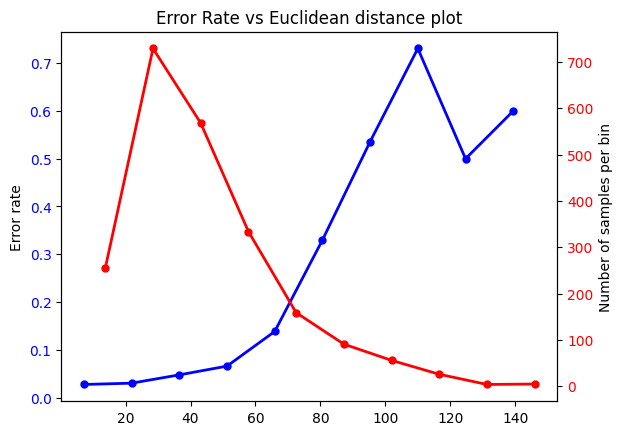

In [86]:
min_dists, prediction = [], []

for idx in range(qf.shape[0]):
    min_dists.append(distmat[idx][indices[idx]][0])
    #min_dists.append(cd[idx].item())
    prediction.append(1.0 if pids[idx] == pids[qf.shape[0] + indices[idx][0]] else 0.0)

min_dists = np.array(min_dists)
prediction = np.array(prediction)
min_dists = np.clip(min_dists, 0, min_dists.max()+100)

# Define bin edges for min_dists
num_bins = 10  # Adjust number of bins as needed
bins = np.linspace(min_dists.min(), min_dists.max(), num_bins + 1)

# Digitize min_dists into bins
bin_indices = np.digitize(min_dists, bins) - 1

# Compute fraction of 0 values in each bin
fractions = []
bin_counts = []
error_count, total_count = 0, 0
for i in range(num_bins):
    mask = bin_indices == i
    print(f'Bin {i} errors: {np.sum(prediction[mask] == 0)} / {np.sum(mask)}')
    error_count += np.sum(prediction[mask] == 0)
    total_count += np.sum(mask)
    bin_counts.append(np.sum(mask))
    if np.sum(mask) > 0:  # Avoid division by zero
        fraction_zeros = np.mean(prediction[mask] == 0)
    else:
        fraction_zeros = 0  # If no values in bin, set fraction to 0
    fractions.append(fraction_zeros)

print(f'Total errors: {error_count} / {total_count}')

# Compute bin centers for plotting
bin_centers = (bins[:-1] + bins[1:]) / 2

fig, ax1 = plt.subplots()

# Plot histogram
# make a line plot instead
ax1.plot(bin_centers-0.3*(bins[1] - bins[0]), fractions, color='blue', marker='o', linestyle='-', linewidth=2, markersize=5)
#ax1.bar(bin_centers-0.3*(bins[1] - bins[0]), fractions, width=(bins[1] - bins[0]) * 0.6, align='center', color='blue')
ax2 = ax1.twinx()

# ax2.bar(bin_centers+0.15*(bins[1] - bins[0]), bin_counts, width=(bins[1] - bins[0]) * 0.3, align='center', color='red')
# make a line plot instead
ax2.plot(bin_centers+0.15*(bins[1] - bins[0]), bin_counts, color='red', marker='o', linestyle='-', linewidth=2, markersize=5)
plt.xlabel('Euclidian distance')
#plt.xlabel('Entropy')
ax1.set_ylabel('Error rate')
ax2.set_ylabel('Number of samples per bin')

ax1.tick_params(axis='y', labelcolor='blue')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Error Rate vs Euclidean distance plot')
#plt.title('Error Rate vs Entropy plot')
plt.show()


# Cosine dist

Bin 0 errors: 3 / 19
Bin 1 errors: 13 / 180
Bin 2 errors: 47 / 567
Bin 3 errors: 58 / 723
Bin 4 errors: 32 / 463
Bin 5 errors: 20 / 183
Bin 6 errors: 6 / 63
Bin 7 errors: 3 / 25
Bin 8 errors: 1 / 3
Bin 9 errors: 1 / 1
Total errors: 184 / 2227


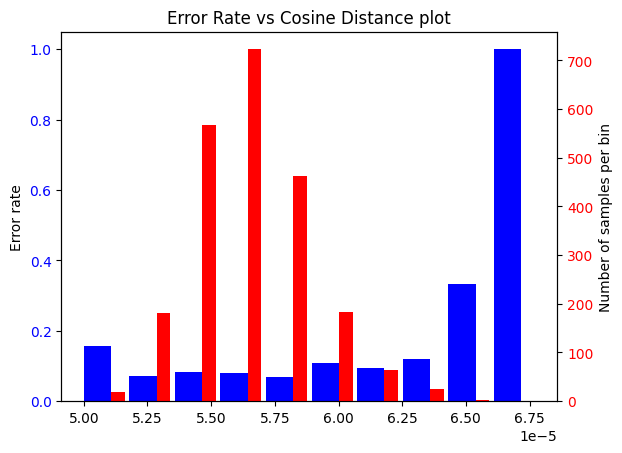

In [87]:
min_dists, prediction = [], []
cos_indices = indices #np.argsort(cos_distmat, axis=1)
for idx in range(qf.shape[0]):
    min_dists.append(cos_distmat[idx][cos_indices[idx]][0])
    #min_dists.append(cd[idx].item())
    prediction.append(1.0 if pids[idx] == pids[qf.shape[0] + cos_indices[idx][0]] else 0.0)

min_dists = np.array(min_dists)
prediction = np.array(prediction)
min_dists = np.clip(min_dists, 0, min_dists.max()+100)

# Define bin edges for min_dists
num_bins = 10  # Adjust number of bins as needed
bins3 = np.linspace(min_dists.min(), min_dists.max(), num_bins + 1)

# Digitize min_dists into bins
bin_indices = np.digitize(min_dists, bins3) - 1

# Compute fraction of 0 values in each bin
fractions3 = []
bin_counts = []
error_count, total_count = 0, 0
for i in range(num_bins):
    mask = bin_indices == i
    print(f'Bin {i} errors: {np.sum(prediction[mask] == 0)} / {np.sum(mask)}')
    error_count += np.sum(prediction[mask] == 0)
    total_count += np.sum(mask)
    bin_counts.append(np.sum(mask))
    if np.sum(mask) > 0:  # Avoid division by zero
        fraction_zeros = np.mean(prediction[mask] == 0)
    else:
        fraction_zeros = 0  # If no values in bin, set fraction to 0
    fractions3.append(fraction_zeros)

print(f'Total errors: {error_count} / {total_count}')

# Compute bin centers for plotting
bin_centers3 = (bins3[:-1] + bins3[1:]) / 2

fig, ax1 = plt.subplots()

# Plot histogram
ax1.bar(bin_centers3-0.3*(bins3[1] - bins3[0]), fractions3, width=(bins3[1] - bins3[0]) * 0.6, align='center', color='blue')
ax2 = ax1.twinx()

ax2.bar(bin_centers3+0.15*(bins3[1] - bins3[0]), bin_counts, width=(bins3[1] - bins3[0]) * 0.3, align='center', color='red')
plt.xlabel('Cosine distance')
#plt.xlabel('Entropy')
ax1.set_ylabel('Error rate')
ax2.set_ylabel('Number of samples per bin')

ax1.tick_params(axis='y', labelcolor='blue')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Error Rate vs Cosine Distance plot')
#plt.title('Error Rate vs Entropy plot')
plt.show()


# TENT entropy

Bin 0 errors: 0 / 1
Bin 1 errors: 1 / 5
Bin 2 errors: 1 / 13
Bin 3 errors: 2 / 41
Bin 4 errors: 10 / 145
Bin 5 errors: 27 / 322
Bin 6 errors: 45 / 664
Bin 7 errors: 59 / 742
Bin 8 errors: 33 / 274
Bin 9 errors: 5 / 20
Total errors: 183 / 2227


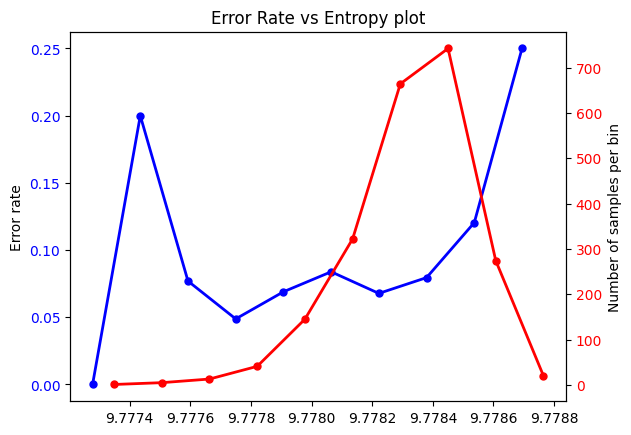

In [88]:
min_dists, prediction = [], []
cos_indices = indices #np.argsort(cos_distmat, axis=1)
for idx in range(qf.shape[0]):
    min_dists.append(cd[idx])
    #min_dists.append(cd[idx].item())
    prediction.append(1.0 if pids[idx] == pids[qf.shape[0] + cos_indices[idx][0]] else 0.0)

min_dists = np.array(min_dists)
prediction = np.array(prediction)
min_dists = np.clip(min_dists, 0, min_dists.max()+100)

# Define bin edges for min_dists
num_bins = 10  # Adjust number of bins as needed
bins2 = np.linspace(min_dists.min(), min_dists.max(), num_bins + 1)

# Digitize min_dists into bins
bin_indices = np.digitize(min_dists, bins2) - 1

# Compute fraction of 0 values in each bin
fractions2 = []
bin_counts = []
error_count, total_count = 0, 0
for i in range(num_bins):
    mask = bin_indices == i
    print(f'Bin {i} errors: {np.sum(prediction[mask] == 0)} / {np.sum(mask)}')
    error_count += np.sum(prediction[mask] == 0)
    total_count += np.sum(mask)
    bin_counts.append(np.sum(mask))
    if np.sum(mask) > 0:  # Avoid division by zero
        fraction_zeros = np.mean(prediction[mask] == 0)
    else:
        fraction_zeros = 0  # If no values in bin, set fraction to 0
    fractions2.append(fraction_zeros)

print(f'Total errors: {error_count} / {total_count}')

# Compute bin centers for plotting
bin_centers2 = (bins2[:-1] + bins2[1:]) / 2

fig, ax1 = plt.subplots()

# Plot histogram
# ax1.bar(bin_centers2-0.3*(bins2[1] - bins2[0]), fractions2, width=(bins2[1] - bins2[0]) * 0.6, align='center', color='blue')
# make a line plot instead
ax1.plot(bin_centers2-0.3*(bins2[1] - bins2[0]), fractions2, color='blue', marker='o', linestyle='-', linewidth=2, markersize=5)
ax2 = ax1.twinx()

# ax2.bar(bin_centers2+0.15*(bins2[1] - bins2[0]), bin_counts, width=(bins2[1] - bins2[0]) * 0.3, align='center', color='red')
# make a line plot instead
ax2.plot(bin_centers2+0.15*(bins2[1] - bins2[0]), bin_counts, color='red', marker='o', linestyle='-', linewidth=2, markersize=5)
plt.xlabel('Entropy')
#plt.xlabel('Entropy')
ax1.set_ylabel('Error rate')
ax2.set_ylabel('Number of samples per bin')

ax1.tick_params(axis='y', labelcolor='blue')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Error Rate vs Entropy plot')
#plt.title('Error Rate vs Entropy plot')
plt.show()


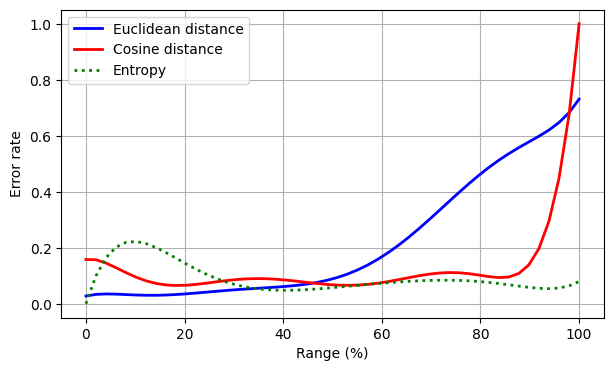

In [93]:
from scipy.interpolate import make_interp_spline

# make a plot with all 3. Use line plots, and on the x axis, just plot % range from 0 to 100. no need for subplots, just 3 line curves on a single plot.
x_vals = np.linspace(0, 100, 50)

# Interpolate the data for smooth curves
spl = make_interp_spline(np.linspace(0, 100, num_bins-2), fractions[:-2], k=7)
f1 = spl(x_vals)
spl = make_interp_spline(np.linspace(0, 100, num_bins-2), fractions2[:-2], k=7)
f2 = spl(x_vals)
spl = make_interp_spline(np.linspace(0, 100, num_bins-2), fractions3[:-3]+[fractions3[-1]], k=7)
f3 = spl(x_vals)
# Plot the smoothed curves
plt.figure(figsize=(7, 4))
plt.plot(x_vals, f1, color='blue', marker='', linestyle='-', linewidth=2, markersize=5, label='Euclidean distance')
plt.plot(x_vals, f3, color='red', marker='', linestyle='-', linewidth=2, markersize=5, label='Cosine distance')
plt.plot(x_vals, f2, color='green', marker='', linestyle=':', linewidth=2, markersize=5, label='Entropy')
plt.xlabel('Range (%)')
plt.ylabel('Error rate')
plt.grid()
# plt.title('Error Rate vs Distance metrics')
plt.legend()
plt.show()

# Mahalanobis dist

Bin 0 errors: 0 / 21
Bin 1 errors: 8 / 263
Bin 2 errors: 24 / 759
Bin 3 errors: 33 / 724
Bin 4 errors: 53 / 327
Bin 5 errors: 52 / 113
Bin 6 errors: 10 / 15
Bin 7 errors: 1 / 1
Bin 8 errors: 2 / 2
Bin 9 errors: 0 / 2
Total errors: 183 / 2227


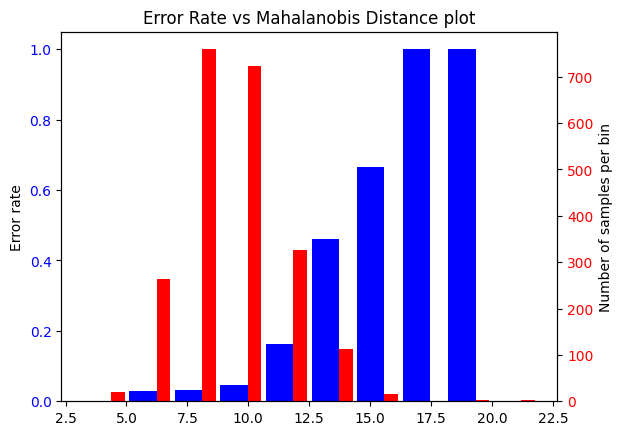

In [8]:
min_dists, prediction = [], []
cos_indices = indices #np.argsort(cos_distmat, axis=1)
for idx in range(qf.shape[0]):
    min_dists.append(md[idx][cos_indices[idx]][0])
    #min_dists.append(cd[idx].item())
    prediction.append(1.0 if pids[idx] == pids[qf.shape[0] + cos_indices[idx][0]] else 0.0)

min_dists = np.array(min_dists)
prediction = np.array(prediction)
min_dists = np.clip(min_dists, 0, min_dists.max()+100)

# Define bin edges for min_dists
num_bins = 10  # Adjust number of bins as needed
bins = np.linspace(min_dists.min(), min_dists.max(), num_bins + 1)

# Digitize min_dists into bins
bin_indices = np.digitize(min_dists, bins) - 1

# Compute fraction of 0 values in each bin
fractions = []
bin_counts = []
error_count, total_count = 0, 0
for i in range(num_bins):
    mask = bin_indices == i
    print(f'Bin {i} errors: {np.sum(prediction[mask] == 0)} / {np.sum(mask)}')
    error_count += np.sum(prediction[mask] == 0)
    total_count += np.sum(mask)
    bin_counts.append(np.sum(mask))
    if np.sum(mask) > 0:  # Avoid division by zero
        fraction_zeros = np.mean(prediction[mask] == 0)
    else:
        fraction_zeros = 0  # If no values in bin, set fraction to 0
    fractions.append(fraction_zeros)

print(f'Total errors: {error_count} / {total_count}')

# Compute bin centers for plotting
bin_centers = (bins[:-1] + bins[1:]) / 2

fig, ax1 = plt.subplots()

# Plot histogram
ax1.bar(bin_centers-0.3*(bins[1] - bins[0]), fractions, width=(bins[1] - bins[0]) * 0.6, align='center', color='blue')
ax2 = ax1.twinx()

ax2.bar(bin_centers+0.15*(bins[1] - bins[0]), bin_counts, width=(bins[1] - bins[0]) * 0.3, align='center', color='red')
plt.xlabel('Mahalanobis distance')
#plt.xlabel('Entropy')
ax1.set_ylabel('Error rate')
ax2.set_ylabel('Number of samples per bin')

ax1.tick_params(axis='y', labelcolor='blue')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Error Rate vs Mahalanobis Distance plot')
#plt.title('Error Rate vs Entropy plot')
plt.show()


0.57648075 1.0000004
Bin 0 errors: 11 / 15
Bin 1 errors: 56 / 85
Bin 2 errors: 121 / 344
Bin 3 errors: 118 / 854
Bin 4 errors: 73 / 2166
Bin 5 errors: 46 / 3806
Bin 6 errors: 43 / 2960
Bin 7 errors: 29 / 1160
Bin 8 errors: 7 / 243
Bin 9 errors: 1 / 25
Total errors: 505 / 11658


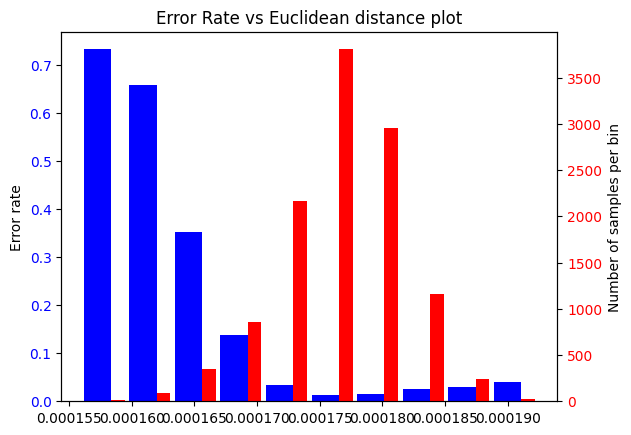

In [64]:
min_dists, prediction = [], []

temperature = 1000.0
soft_distmat = np.exp(-distmat / temperature)
print(soft_distmat.min(), soft_distmat.max())
soft_distmat = soft_distmat / soft_distmat.sum(axis=1, keepdims=True)
soft_distmat = - soft_distmat * np.log(soft_distmat)

for idx in range(qf.shape[0]):
    min_dists.append(soft_distmat[idx][indices[idx]][0])
    #min_dists.append(cd[idx].item())
    prediction.append(1.0 if pids[idx] == pids[qf.shape[0] + indices[idx][0]] else 0.0)

min_dists = np.array(min_dists)
prediction = np.array(prediction)
min_dists = np.clip(min_dists, 0, min_dists.max()+100)

# Define bin edges for min_dists
num_bins = 10  # Adjust number of bins as needed
bins = np.linspace(min_dists.min(), min_dists.max(), num_bins + 1)

# Digitize min_dists into bins
bin_indices = np.digitize(min_dists, bins) - 1

# Compute fraction of 0 values in each bin
fractions = []
bin_counts = []
error_count, total_count = 0, 0
for i in range(num_bins):
    mask = bin_indices == i
    print(f'Bin {i} errors: {np.sum(prediction[mask] == 0)} / {np.sum(mask)}')
    error_count += np.sum(prediction[mask] == 0)
    total_count += np.sum(mask)
    bin_counts.append(np.sum(mask))
    if np.sum(mask) > 0:  # Avoid division by zero
        fraction_zeros = np.mean(prediction[mask] == 0)
    else:
        fraction_zeros = 0  # If no values in bin, set fraction to 0
    fractions.append(fraction_zeros)

print(f'Total errors: {error_count} / {total_count}')

# Compute bin centers for plotting
bin_centers = (bins[:-1] + bins[1:]) / 2

fig, ax1 = plt.subplots()

# Plot histogram
ax1.bar(bin_centers-0.3*(bins[1] - bins[0]), fractions, width=(bins[1] - bins[0]) * 0.6, align='center', color='blue')
ax2 = ax1.twinx()

ax2.bar(bin_centers+0.15*(bins[1] - bins[0]), bin_counts, width=(bins[1] - bins[0]) * 0.3, align='center', color='red')
plt.xlabel('Euclidian distance')
#plt.xlabel('Entropy')
ax1.set_ylabel('Error rate')
ax2.set_ylabel('Number of samples per bin')

ax1.tick_params(axis='y', labelcolor='blue')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Error Rate vs Euclidean distance plot')
#plt.title('Error Rate vs Entropy plot')
plt.show()


# Trash

Bin 0 errors: 2 / 7
Bin 1 errors: 1 / 7
Bin 2 errors: 5 / 30
Bin 3 errors: 8 / 51
Bin 4 errors: 12 / 78
Bin 5 errors: 11 / 112
Bin 6 errors: 14 / 188
Bin 7 errors: 32 / 307
Bin 8 errors: 31 / 512
Bin 9 errors: 48 / 844
Bin 10 errors: 57 / 1173
Bin 11 errors: 64 / 1471
Bin 12 errors: 69 / 1762
Bin 13 errors: 59 / 1660
Bin 14 errors: 43 / 1424
Bin 15 errors: 28 / 1001
Bin 16 errors: 11 / 619
Bin 17 errors: 9 / 289
Bin 18 errors: 1 / 88
Bin 19 errors: 0 / 35
Total errors: 505 / 11658


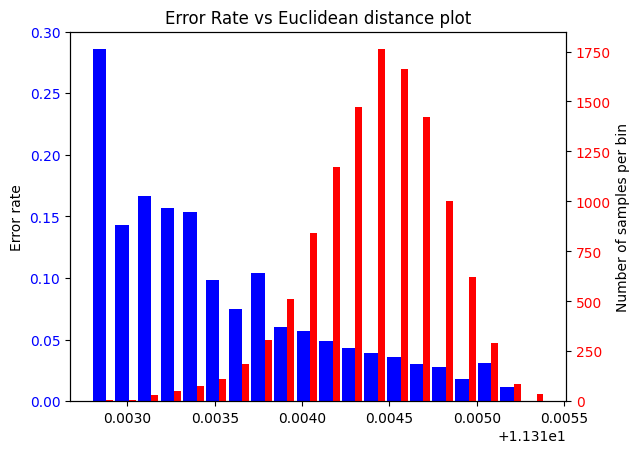

In [32]:
min_dists, prediction = [], []

for idx in range(qf.shape[0]):
    #min_dists.append(distmat[idx][indices[idx]][0])
    min_dists.append(cd[idx].item())
    prediction.append(1.0 if pids[idx] == pids[qf.shape[0] + indices[idx][0]] else 0.0)

min_dists = np.array(min_dists)
prediction = np.array(prediction)
min_dists = np.clip(min_dists, 0, min_dists.max()+100)

# Define bin edges for min_dists
num_bins = 20  # Adjust number of bins as needed
bins = np.linspace(min_dists.min(), min_dists.max(), num_bins + 1)

# Digitize min_dists into bins
bin_indices = np.digitize(min_dists, bins) - 1

# Compute fraction of 0 values in each bin
fractions = []
bin_counts = []
error_count, total_count = 0, 0
for i in range(num_bins):
    mask = bin_indices == i
    print(f'Bin {i} errors: {np.sum(prediction[mask] == 0)} / {np.sum(mask)}')
    error_count += np.sum(prediction[mask] == 0)
    total_count += np.sum(mask)
    bin_counts.append(np.sum(mask))
    if np.sum(mask) > 0:  # Avoid division by zero
        fraction_zeros = np.mean(prediction[mask] == 0)
    else:
        fraction_zeros = 0  # If no values in bin, set fraction to 0
    fractions.append(fraction_zeros)

print(f'Total errors: {error_count} / {total_count}')

# Compute bin centers for plotting
bin_centers = (bins[:-1] + bins[1:]) / 2

fig, ax1 = plt.subplots()

# Plot histogram
ax1.bar(bin_centers-0.3*(bins[1] - bins[0]), fractions, width=(bins[1] - bins[0]) * 0.6, align='center', color='blue')
ax2 = ax1.twinx()

ax2.bar(bin_centers+0.15*(bins[1] - bins[0]), bin_counts, width=(bins[1] - bins[0]) * 0.3, align='center', color='red')
plt.xlabel('Euclidian distance')
#plt.xlabel('Entropy')
ax1.set_ylabel('Error rate')
ax2.set_ylabel('Number of samples per bin')

ax1.tick_params(axis='y', labelcolor='blue')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Error Rate vs Euclidean distance plot')
#plt.title('Error Rate vs Entropy plot')
plt.show()

In [16]:
import json
import re
import ast

# filepath = "/export/livia/home/vision/Rbhattacharya/work/reid_sandbox/CLIP-ReID/ABL_5p1_NE.txt"
# filepath2 = "/export/livia/home/vision/Rbhattacharya/work/reid_sandbox/CLIP-ReID/ABL_5p1_E.txt"

filepath = "/export/livia/home/vision/Rbhattacharya/work/reid_sandbox/CLIP-ReID/ABL_5p1_lite_NE.txt"
filepath2 = "/export/livia/home/vision/Rbhattacharya/work/reid_sandbox/CLIP-ReID/ABL_5p1_lite_E.txt"


# tentpath = "/export/livia/home/vision/Rbhattacharya/work/reid_sandbox/CLIP-ReID/outputs/logs/ABL_5p1_tent_E.txt"
# temppath = "/export/livia/home/vision/Rbhattacharya/work/reid_sandbox/CLIP-ReID/outputs/logs/ABL_5p1_temp_E.txt"

def parse_output(path):
    with open(path, 'r') as f:
        lines = f.readlines()

    dicts = []

    for idx, line in enumerate(lines):
        if "TTA Args" in line:
            l = line[:-1]
            dict_str = re.search(r'\{.*\}', l).group()
            d = ast.literal_eval(dict_str)
            if idx+5 >= len(lines):
                break
            l_map, l_r1, l_r5, l_r10 = lines[idx+5][:-1], lines[idx+6][:-1], lines[idx+7][:-1], lines[idx+8][:-1]
            mAP = float(l_map.split(' ')[-1][:-1])
            R1 = float(l_r1.split(' ')[-1][1:-1])
            R5 = float(l_r5.split(' ')[-1][1:-1])
            R10 = float(l_r10.split(' ')[-1][1:-1])
            d['mAP'] = mAP
            d['R1'] = R1
            d['R5'] = R5
            d['R10'] = R10
            dicts.append(d)
    return dicts

dicts = parse_output(filepath)
dicts2 = parse_output(filepath2)
# dicts2 = parse_output(tentpath)
# dicts3 = parse_output(temppath)



    #break

# This is a string: Using TTA Args 1 or 576, Parameters: {'steps': 1, 'device': 'cuda', 'lr': 5e-05, 'topk': 1, 'temp': 100.0, 'episodic': False, 'lite': False, 'use_norm': True}
# how to extract the dictionary from the string?
# The string is in the format: Using TTA Args 1 or 576, Parameters: {'steps': 1, 'device': 'cuda', 'lr': 5e-05, 'topk': 1, 'temp': 100.0, 'episodic': False, 'lite': False, 'use_norm': True}


In [11]:
print(len(dicts), len(dicts2), len(dicts3))

for DICT in [dicts, dicts2, dicts3]:
    
    count = 0
    for d in DICT:
        #print(d)
        if d['mAP'] < 2.0: 
            
            count+=1
    print(count)

320 320 320
0
0
0


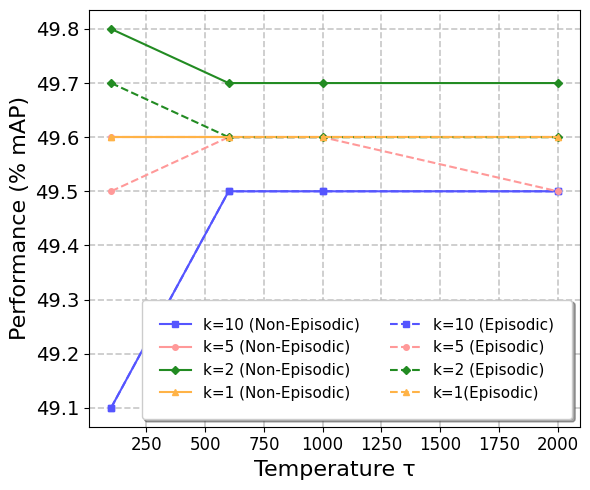

In [26]:
y_vals = ['mAP', 'R1', 'R5', 'R10']
x_vals = ['steps', 'lr', 'topk', 'temp']

constants = {"steps": 1, "lr": 5e-05, "topk": 1, "temp": 100.0, "episodic":True}

ptype = 'tplot' # 'tplot' or 'kplot'

def get_xy(DICT, x_vals, y_vals, x_choice, y_choice, constants):
    x, y = [], []
    for d in DICT:
        flag = True
        for k,v in d.items():
            if k not in list(constants.keys()):
                continue
            else:
                if k not in [x_choice, y_choice]:
                    if v != constants[k]:
                        flag = False
                        break
                    else:
                        continue
        
        if flag:
            x.append(d[x_choice])
            y.append(d[y_choice])
    
    return x, y

if ptype == 'tplot':
    X_ne, Y_ne = get_xy(dicts, x_vals, y_vals, 'temp', 'mAP', {"steps": 20, "lr": 0.00005, "topk": 1, "temp": 100.0})
    _, Y1_ne = get_xy(dicts, x_vals, y_vals, 'temp', 'mAP', {"steps": 20, "lr": 0.00005, "topk": 2, "temp": 600.0})
    _, Y2_ne = get_xy(dicts, x_vals, y_vals, 'temp', 'mAP', {"steps": 20, "lr": 0.00005, "topk": 5, "temp": 1000.0})
    _, Y3_ne = get_xy(dicts, x_vals, y_vals, 'temp', 'mAP', {"steps": 20, "lr": 0.00005, "topk": 10, "temp": 2000.0})

    X_e, Y_e = get_xy(dicts2, x_vals, y_vals, 'temp', 'mAP', {"steps": 20, "lr": 0.00005, "topk": 1, "temp": 100.0})
    _, Y1_e = get_xy(dicts2, x_vals, y_vals, 'temp', 'mAP', {"steps": 20, "lr": 0.00005, "topk": 2, "temp": 600.0})
    _, Y2_e = get_xy(dicts2, x_vals, y_vals, 'temp', 'mAP', {"steps": 20, "lr": 0.00005, "topk": 5, "temp": 1000.0})
    _, Y3_e = get_xy(dicts2, x_vals, y_vals, 'temp', 'mAP', {"steps": 20, "lr": 0.00005, "topk": 10, "temp": 2000.0})
elif ptype == 'kplot':
    X_ne, Y_ne = get_xy(dicts, x_vals, y_vals, 'topk', 'mAP', {"steps": 20, "lr": 0.00005, "topk": 1, "temp": 100.0})
    _, Y1_ne = get_xy(dicts, x_vals, y_vals, 'topk', 'mAP', {"steps": 20, "lr": 0.00005, "topk": 2, "temp": 600.0})
    _, Y2_ne = get_xy(dicts, x_vals, y_vals, 'topk', 'mAP', {"steps": 20, "lr": 0.00005, "topk": 5, "temp": 1000.0})
    _, Y3_ne = get_xy(dicts, x_vals, y_vals, 'topk', 'mAP', {"steps": 20, "lr": 0.00005, "topk": 10, "temp": 2000.0})

    X_e, Y_e = get_xy(dicts2, x_vals, y_vals, 'topk', 'mAP', {"steps": 20, "lr": 0.00005, "topk": 1, "temp": 100.0})
    _, Y1_e = get_xy(dicts2, x_vals, y_vals, 'topk', 'mAP', {"steps": 20, "lr": 0.00005, "topk": 2, "temp": 600.0})
    _, Y2_e = get_xy(dicts2, x_vals, y_vals, 'topk', 'mAP', {"steps": 20, "lr": 0.00005, "topk": 5, "temp": 1000.0})
    _, Y3_e = get_xy(dicts2, x_vals, y_vals, 'topk', 'mAP', {"steps": 20, "lr": 0.00005, "topk": 10, "temp": 2000.0})
elif ptype == 'splot':
    X, Y = get_xy(dicts, x_vals, y_vals, 'steps', 'mAP', {"steps": 1, "lr": 0.00005, "topk": 1, "temp": 100.0})
    _, Y1 = get_xy(dicts2, x_vals, y_vals, 'steps', 'mAP', {"steps": 1, "lr": 0.00005, "topk": 1, "temp": 100.0})
    _, Y2 = get_xy(dicts3, x_vals, y_vals, 'steps', 'mAP', {"steps": 1, "lr": 0.00005, "topk": 1, "temp": 100.0})

    _, Y4 = get_xy(dicts, x_vals, y_vals, 'steps', 'R1', {"steps": 1, "lr": 0.00005, "topk": 1, "temp": 100.0})
    _, Y5 = get_xy(dicts2, x_vals, y_vals, 'steps', 'R1', {"steps": 1, "lr": 0.00005, "topk": 1, "temp": 100.0})
    _, Y6 = get_xy(dicts3, x_vals, y_vals, 'steps', 'R1', {"steps": 1, "lr": 0.00005, "topk": 1, "temp": 100.0})

    Y = [43.8] + Y
    Y1 = [43.8] + Y1
    Y2 = [43.8] + Y2
    Y4 = [49.6] + Y4
    Y5 = [49.6] + Y5
    Y6 = [49.6] + Y6
    X = [0] + X



plt.figure(figsize=(6, 5))
if ptype == 'splot':
# First three lines
    line1, = plt.plot(X, Y,linestyle='-', linewidth=1.5, markersize=4, marker='o', label="Ours (mAP)")
    line2, = plt.plot(X, Y1,linestyle='-', linewidth=1.5, markersize=4, marker='o', label="TENT (mAP)")
    line3, = plt.plot(X, Y2,linestyle='-', linewidth=1.5, markersize=4, marker='o', label="TEMP (mAP)")

    # Get their colors
    color1 = line1.get_color()
    color2 = line2.get_color()
    color3 = line3.get_color()

    # Next three lines with same colors
    plt.plot(X, Y4, linestyle='--', linewidth=1.5, markersize=4, marker='x', color=color1, label="Ours (R1)")
    plt.plot(X, Y5, linestyle='--', linewidth=1.5, markersize=4, marker='x', color=color2, label="TENT (R1)")
    plt.plot(X, Y6, linestyle='--', linewidth=1.5, markersize=4, marker='x', color=color3, label="TEMP (R1)")
    plt.xlabel("Steps", fontsize=16)
    plt.xticks(np.arange(21))

if ptype == 'kplot':
    plt.plot(X_ne, Y3_ne, color='#5555FF', linestyle='-', linewidth=1.5, markersize=4, marker='s', label="τ=2000 (Non-Episodic)")
    plt.plot(X_ne, Y2_ne, color='#FF9999', linestyle='-', linewidth=1.5, markersize=4, marker='s', label="τ=1000 (Non-Episodic)")
    plt.plot(X_ne, Y1_ne, color='#228B22', linestyle='-', linewidth=1.5, markersize=4, marker='s', label="τ=600 (Non-Episodic)")
    plt.plot(X_ne, Y_ne, color='#FFB347', linestyle='-', linewidth=1.5, markersize=4, marker='s', label="τ=100 (Non-Episodic)")


    plt.plot(X_e, Y3_e, color='#5555FF', linestyle='--', linewidth=1.5, markersize=4, marker='s', label="τ=2000 (Episodic)")
    plt.plot(X_e, Y2_e, color='#FF9999', linestyle='--', linewidth=1.5, markersize=4, marker='s', label="τ=1000 (Episodic)")
    plt.plot(X_e, Y1_e, color='#228B22', linestyle='--', linewidth=1.5, markersize=4, marker='s', label="τ=600 (Episodic)")
    plt.plot(X_e, Y_e, color='#FFB347', linestyle='--', linewidth=1.5, markersize=4, marker='s', label="τ=100 (Episodic)")
    plt.xlabel("k-value", fontsize=16)

elif ptype == 'tplot':
    plt.plot(X_ne, Y3_ne, color='#5555FF', linestyle='-', linewidth=1.5, markersize=4, marker='s', label="k=10 (Non-Episodic)")
    plt.plot(X_ne, Y2_ne, color='#FF9999', linestyle='-', linewidth=1.5, markersize=4, marker='o', label="k=5 (Non-Episodic)")
    plt.plot(X_ne, Y1_ne, color='#228B22', linestyle='-', linewidth=1.5, markersize=4, marker='D', label="k=2 (Non-Episodic)")
    plt.plot(X_ne, Y_ne, color='#FFB347', linestyle='-', linewidth=1.5, markersize=4, marker='^', label="k=1 (Non-Episodic)")


    plt.plot(X_e, Y3_e, color='#5555FF', linestyle='--', linewidth=1.5, markersize=4, marker='s', label="k=10 (Episodic)")
    plt.plot(X_e, Y2_e, color='#FF9999', linestyle='--', linewidth=1.5, markersize=4, marker='o', label="k=5 (Episodic)")
    plt.plot(X_e, Y1_e, color='#228B22', linestyle='--', linewidth=1.5, markersize=4, marker='D', label="k=2 (Episodic)")
    plt.plot(X_e, Y_e, color='#FFB347', linestyle='--', linewidth=1.5, markersize=4, marker='^', label="k=1(Episodic)")

    plt.xlabel("Temperature τ", fontsize=16)
plt.ylabel("Performance (% mAP)", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)

# plt.ylim(39, 51.5)
# plt.xlim(1, 100)

# how to make the plot start from 1 on x axis?
#plt.xticks([1] + np.arange(10, 101, 10).tolist())

# position legend outside the plot
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=8)
# plt.legend(loc='lower right', bbox_to_anchor=(1.0, 0.1), fontsize=11, ncols=2, frameon=True, fancybox=True, shadow=True, borderpad=1.2)
plt.legend(loc='lower right', fontsize=11, ncols=2, frameon=True, fancybox=True, shadow=True, borderpad=1.2)
plt.grid(True, which='both', linestyle='--', linewidth=1.2, alpha=0.7)
plt.tight_layout()
#plt.legend()
# plt.show()
if ptype == "kplot": plt.savefig("/export/livia/home/vision/Rbhattacharya/work/reid_sandbox/CLIP-ReID/fig/ablation_figs/abl_5p1_k.png", dpi=300, bbox_inches='tight')
elif ptype == "tplot": plt.savefig("/export/livia/home/vision/Rbhattacharya/work/reid_sandbox/CLIP-ReID/fig/ablation_figs/abl_5p1_t.png", dpi=300, bbox_inches='tight')
elif ptype == "splot": plt.savefig("/export/livia/home/vision/Rbhattacharya/work/reid_sandbox/CLIP-ReID/fig/ablation_figs/abl_5p1_s_E.png", dpi=300, bbox_inches='tight')

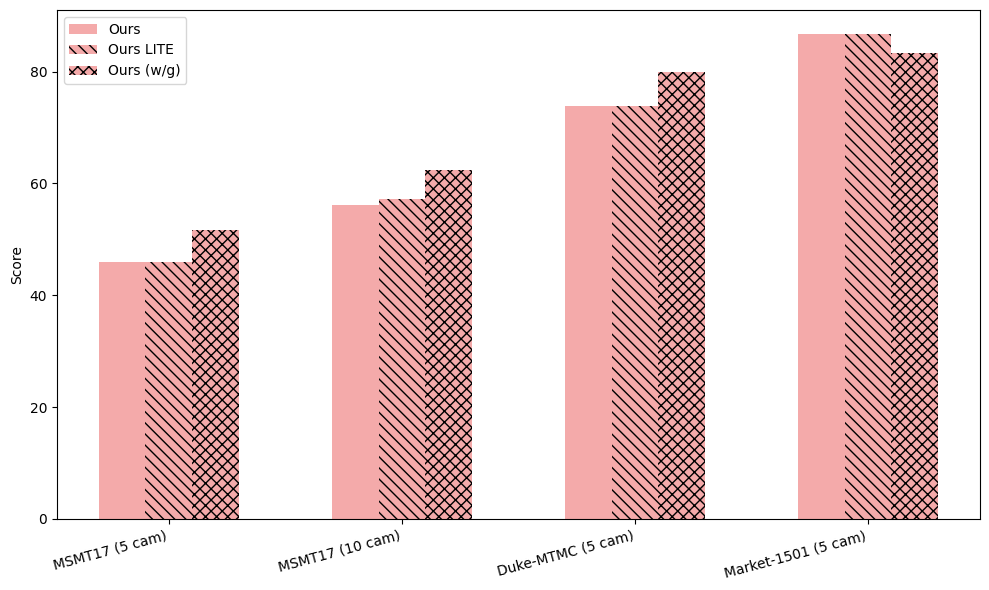

In [6]:
sources = ["MSMT17 (5 cam)", "MSMT17 (10 cam)", "Duke-MTMC (5 cam)", "Market-1501 (5 cam)"]
methods = ["Ours", "Ours LITE", "Ours (w/g)"]
scores = [[46.0, 45.9, 51.7], [56.2, 57.2, 62.4], [73.8, 73.9, 80.0], [86.7, 86.7, 83.3]]
#hatch_patterns = ['///', '\\\\\\', 'xxx']  # one per method
hatch_patterns = ['', '\\\\\\', 'xxx']  # one per method

# Colors (default to faded red)
default_colors = ['#f4aaaa', '#f4aaaa', '#f4aaaa']

# Plot setup
num_sources = len(sources)
num_methods = len(methods)
bar_width = 0.2
x = np.arange(num_sources)

fig, ax = plt.subplots(figsize=(10, 6))

# Draw bars
for i in range(num_methods):
    # if i == 1: continue
    method_scores = [row[i] for row in scores]
    ax.bar(x + i * bar_width, method_scores, width=bar_width, label=methods[i], color=default_colors[i], hatch=hatch_patterns[i])

# Labels and ticks
ax.set_xticks(x + bar_width)
ax.set_xticklabels(sources, rotation=15, ha='right')
ax.set_ylabel("Score")
# ax.set_title("Method Comparison across Sources")
ax.legend()

plt.tight_layout()
plt.show()


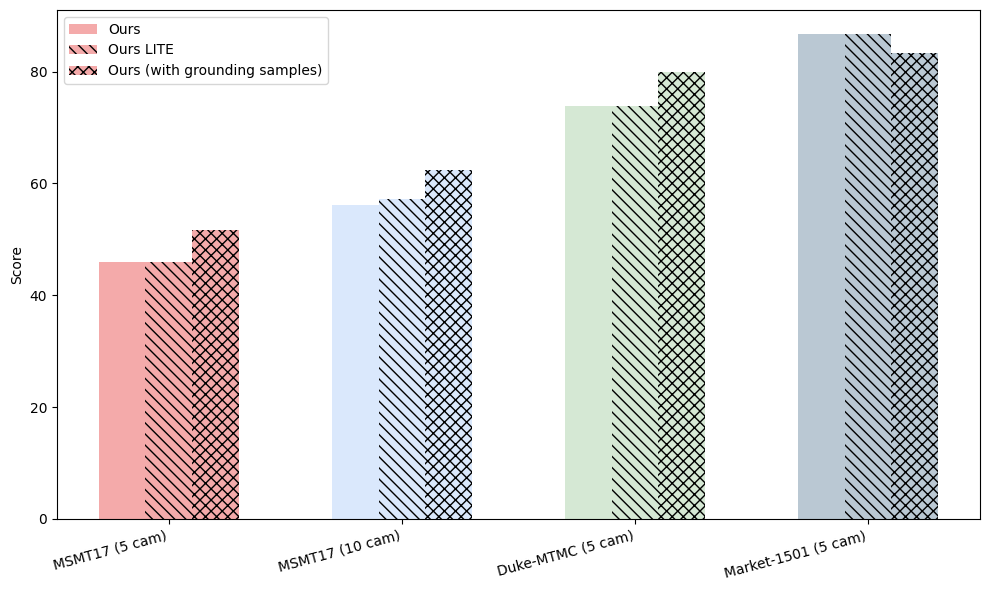

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Data
sources = ["MSMT17 (5 cam)", "MSMT17 (10 cam)", "Duke-MTMC (5 cam)", "Market-1501 (5 cam)"]
methods = ["Ours", "Ours LITE", "Ours (with grounding samples)"]
scores = [
    [46.0, 45.9, 51.7],
    [56.2, 57.2, 62.4],
    [73.8, 73.9, 80.0],
    [86.7, 86.7, 83.3]
]

# Hatching per method
hatch_patterns = ['', '\\\\\\', 'xxx']

# Colors per source (default: faded reds with slight variations)
source_colors = ['#f4aaaa', '#DAE8FC', '#D5E8D4', '#BAC8D3']

# Plot setup
num_sources = len(sources)
num_methods = len(methods)
bar_width = 0.2
x = np.arange(num_sources)

fig, ax = plt.subplots(figsize=(10, 6))

# Draw bars: loop by method first, then assign color per source
for i in range(num_methods):
    method_scores = [row[i] for row in scores]
    colors = [source_colors[j] for j in range(num_sources)]
    ax.bar(
        x + i * bar_width,
        method_scores,
        width=bar_width,
        label=methods[i],
        color=colors,
        hatch=hatch_patterns[i]
    )

# Labels and ticks
ax.set_xticks(x + bar_width)
ax.set_xticklabels(sources, rotation=15, ha='right')
ax.set_ylabel("Score")
ax.legend()

plt.tight_layout()
#plt.show()
plt.savefig("/export/livia/home/vision/Rbhattacharya/work/reid_sandbox/CLIP-ReID/fig/wg_effect.png", dpi=300, bbox_inches='tight')


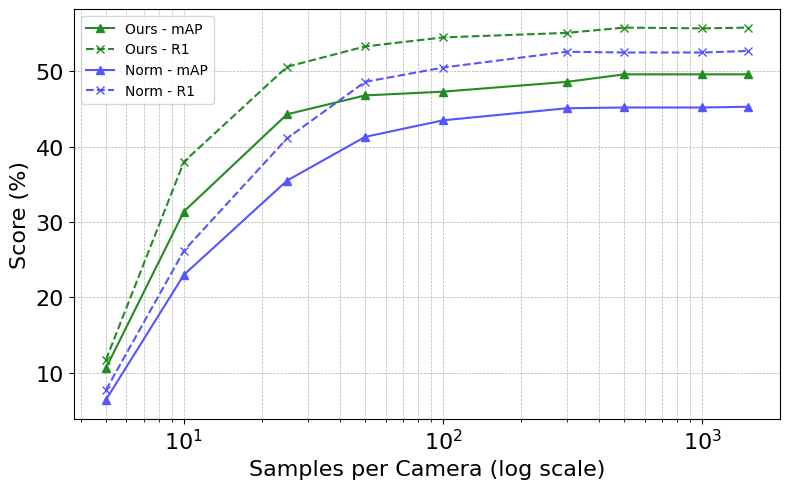

In [35]:

# Provided data
cases = [5, 10, 25, 50, 100, 300, 500, 1000, 1500]
mAP_ours = [10.6, 31.4, 44.3, 46.8, 47.3, 48.6, 49.6, 49.6, 49.6]
r1_ours = [11.7, 38.0, 50.6, 53.3, 54.5, 55.1, 55.8, 55.7, 55.8]
mAP_norm = [6.4, 23.0, 35.5, 41.3, 43.5, 45.1, 45.2, 45.2, 45.3]
r1_norm = [7.7, 26.2, 41.1, 48.6, 50.5, 52.6, 52.5, 52.5, 52.7]

# Create log-scale plot
plt.figure(figsize=(8, 5))

# Ours method (green)
plt.plot(cases, mAP_ours, color='#228B22', linestyle='-', marker='^', label='Ours - mAP')
plt.plot(cases, r1_ours, color='#228B22', linestyle='--', marker='x', label='Ours - R1')

# Norm method (blue)
plt.plot(cases, mAP_norm, color='#5555FF', linestyle='-', marker='^', label='Norm - mAP')
plt.plot(cases, r1_norm, color='#5555FF', linestyle='--', marker='x', label='Norm - R1')

# Apply logarithmic scale to X-axis
plt.xscale('log')

# Labels and formatting
plt.xlabel("Samples per Camera (log scale)", fontsize=16)
plt.ylabel("Score (%)", fontsize=16)
# plt.title("Log-Scale Comparison of mAP and R1 vs Number of Cases")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()


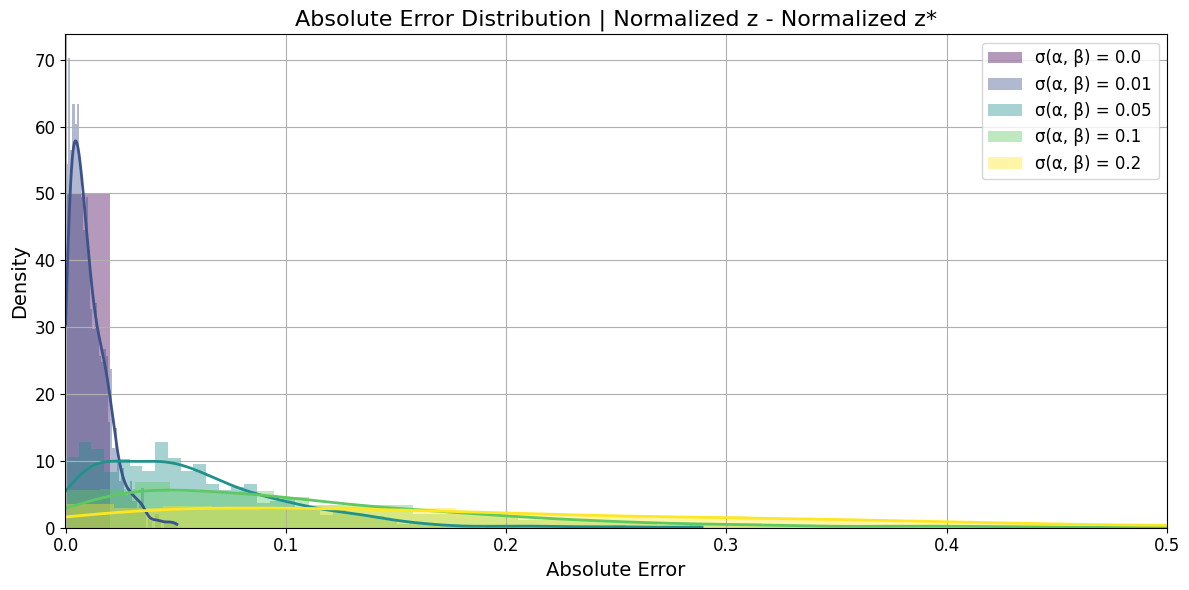

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Set seed for reproducibility
np.random.seed(42)

# Font size control
title_fontsize = 16
label_fontsize = 14
legend_fontsize = 12
tick_fontsize = 12

# Generate ideal unbiased z* with zero mean and unit variance
n = 1000
z_star = np.random.normal(loc=0, scale=1, size=n)

# Define function to normalize
def normalize(x):
    return (x - np.mean(x)) / np.std(x)

# Different levels of noise (std dev) for alpha and beta
noise_levels = [0.0, 0.01, 0.05, 0.1, 0.2]
colors = plt.cm.viridis(np.linspace(0, 1, len(noise_levels)))
results = []

for noise in noise_levels:
    alpha = 1.0 + np.random.normal(0, noise, size=n)
    beta = np.random.normal(0, noise, size=n)
    z = alpha * z_star + beta

    z_norm = normalize(z)
    z_star_norm = normalize(z_star)

    # Absolute error between normalized z and z*
    abs_error = np.abs(z_norm - z_star_norm)
    results.append((noise, abs_error))

# Plotting the results
plt.figure(figsize=(12, 6))
for (noise, abs_error), color in zip(results, colors):
    # Histogram of absolute errors
    counts, bins, patches = plt.hist(
        abs_error, bins=50, alpha=0.4, density=True,
        label=f"σ(α, β) = {noise}", color=color
    )

    # KDE smoothing if data is not constant
    if np.std(abs_error) > 0:
        kde = gaussian_kde(abs_error)
        x_vals = np.linspace(0, np.max(abs_error), 500)
        plt.plot(x_vals, kde(x_vals), color=color, linewidth=2)

plt.title("Absolute Error Distribution | Normalized z - Normalized z*", fontsize=title_fontsize)
plt.xlabel("Absolute Error", fontsize=label_fontsize)
plt.ylabel("Density", fontsize=label_fontsize)
plt.xticks(fontsize=tick_fontsize)
plt.yticks(fontsize=tick_fontsize)
plt.legend(fontsize=legend_fontsize)
plt.grid(True)
plt.xlim(-0.0001, 0.5)
plt.tight_layout()
plt.show()


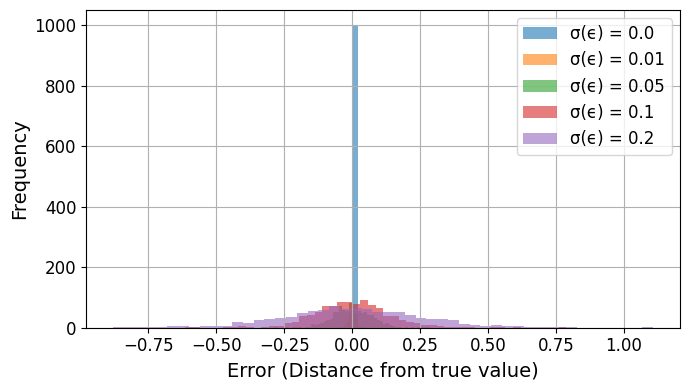

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Font size control
title_fontsize = 16
label_fontsize = 14
legend_fontsize = 12
tick_fontsize = 12

# Generate ideal unbiased z* with zero mean and unit variance
n = 1000
z_star = np.random.normal(loc=0, scale=1, size=n)

# Define function to normalize
def normalize(x):
    return (x - np.mean(x)) / np.std(x)

# Different levels of noise (std dev) for alpha and beta
noise_levels = [0.0, 0.01, 0.05, 0.1, 0.2]
results = []

for noise in noise_levels:
    alpha = 1.0 + np.random.normal(0, noise, size=n)
    beta = np.random.normal(0, noise, size=n)
    z = alpha * z_star + beta

    z_norm = normalize(z)
    z_star_norm = normalize(z_star)

    # Measure error between normalized z and z*
    error = z_norm - z_star_norm
    results.append((noise, error))

# Plotting the results
plt.figure(figsize=(7, 4))
for noise, error in results:
    plt.hist(error, bins=50, alpha=0.6, label=f"σ(ϵ) = {noise}")
# plt.title("Histogram of Normalized z - Normalized z* (Error) vs Noise Level", fontsize=title_fontsize)
plt.xlabel("Error (Distance from true value)", fontsize=label_fontsize)
plt.ylabel("Frequency", fontsize=label_fontsize)
plt.xticks(fontsize=tick_fontsize)
plt.yticks(fontsize=tick_fontsize)
plt.legend(fontsize=legend_fontsize)
plt.grid(True)
plt.tight_layout()
plt.show()


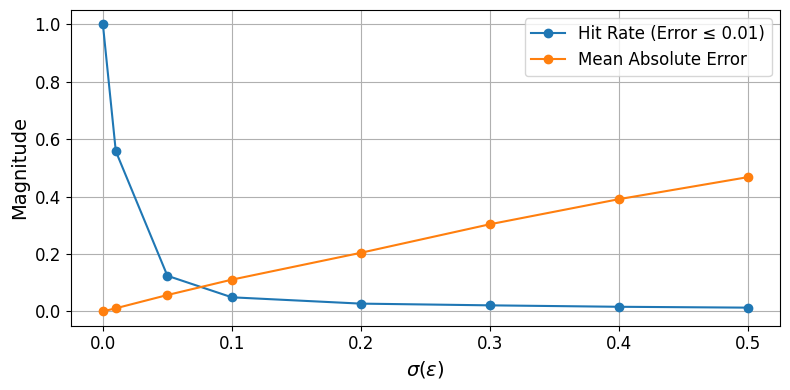

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Set seed for reproducibility
np.random.seed(42)

# Font size control
title_fontsize = 16
label_fontsize = 14
legend_fontsize = 12
tick_fontsize = 12

# Generate ideal unbiased z* with zero mean and unit variance
n = 1000
z_star = np.random.normal(loc=0, scale=1, size=n)

# Define function to normalize
def normalize(x):
    return (x - np.mean(x)) / np.std(x)

# Different levels of noise (std dev) for alpha and beta
noise_levels = [0.0, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
frequencies = []
mean_abs_errors = []
for noise in noise_levels:
    alpha = 1.0 + np.random.normal(0, noise, size=n)
    beta = np.random.normal(0, noise, size=n)
    z = alpha * z_star + beta

    z_norm = normalize(z)
    z_star_norm = normalize(z_star)

    # Mean absolute error
    mean_abs_error = np.mean(np.abs(z_norm - z_star_norm))
    mean_abs_errors.append(mean_abs_error)

# Define the absolute error bin to track frequency (e.g., error <= 0.1)
error_threshold = 0.01

for noise in noise_levels:
    alpha = 1.0 + np.random.normal(0, noise, size=n)
    beta = np.random.normal(0, noise, size=n)
    z = alpha * z_star + beta

    z_norm = normalize(z)
    z_star_norm = normalize(z_star)

    abs_error = np.abs(z_norm - z_star_norm)
    frequency = np.sum(abs_error <= error_threshold) / n
    frequencies.append(frequency)

# KDE smoothing for frequency trend
kde = gaussian_kde(noise_levels, weights=frequencies)
noise_range = np.linspace(min(noise_levels), max(noise_levels), 500)
smoothed_freq = kde(noise_range)

# Plotting frequency vs noise
plt.figure(figsize=(8, 4))
plt.plot(noise_levels, frequencies, 'o-', label=f'Hit Rate (Error ≤ {error_threshold})')
plt.plot(noise_levels, mean_abs_errors, 'o-', label='Mean Absolute Error')
# plt.plot(noise_range, smoothed_freq, '--', label='Smoothed (KDE)', alpha=0.7)
plt.xlabel(r'$\sigma(\epsilon)$', fontsize=label_fontsize)
plt.ylabel("Magnitude", fontsize=label_fontsize)
#plt.title("Frequency of Low Error vs Noise Level", fontsize=title_fontsize)
plt.xticks(fontsize=tick_fontsize)
plt.yticks(fontsize=tick_fontsize)
plt.grid(True)
plt.legend(fontsize=legend_fontsize, loc='upper right')
plt.tight_layout()
plt.show()



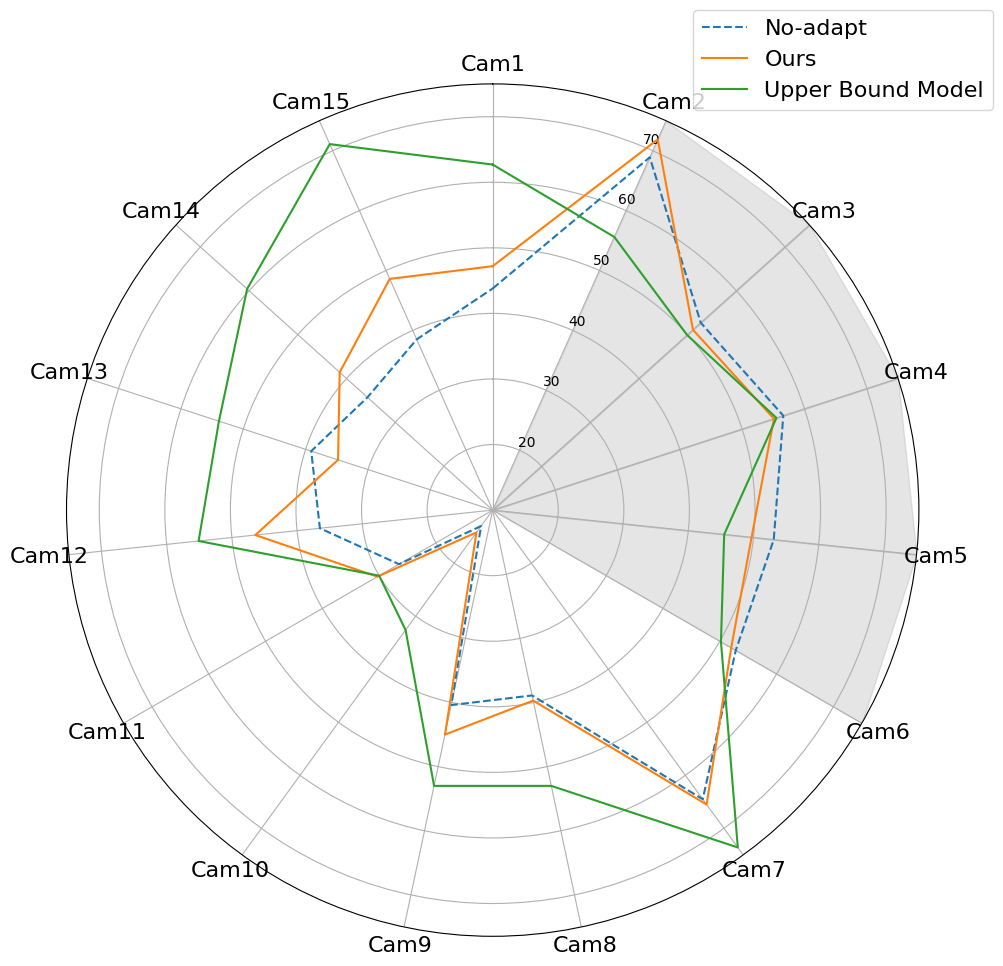

In [30]:
import pandas as pd
from PIL import Image
# import pytesseract
import pandas as pd
import re

# Based on visual inspection, manually extracting mAP values for "Upper bound model"


# Data from image ("No-adapt")
no_adapt_data = {
    "CamID": list(range(1, 16)),
    "mAP": [43.8, 68.9, 52.7, 56.6, 53.1, 52.8, 64.5, 38.9, 40.4, 13.0, 26.5, 36.5, 39.1, 35.7, 38.5],
    "Rank-1": [49.6, 70.6, 57.2, 71.5, 66.2, 60.7, 76.4, 50.3, 54.9, 7.1, 32.2, 51.1, 41.7, 41.7, 42.9],
}

# Data from markdown ("Ours")
ours_data = {
    "CamID": list(range(1, 16)),
    "mAP": [47.2, 71.9, 51.1, 55.1, 49.7, 52.0, 65.5, 39.7, 45.0, 14.2, 30.3, 46.4, 34.8, 41.4, 48.6],
    "Rank-1": [54.0, 76.5, 56.1, 69.9, 59.0, 58.8, 78.3, 52.1, 58.0, 7.1, 39.9, 62.8, 44.4, 48.7, 54.6],
}


upper_bound_data = {
    "CamID": list(range(1, 16)),
    "mAP": [62.7, 55.6, 49.9, 55.5, 45.5, 50.2, 73.6, 53.0, 53.0, 32.6, 30.0, 55.1, 53.9, 60.4, 71.1]
}


df_no_adapt = pd.DataFrame(no_adapt_data)
df_ours = pd.DataFrame(ours_data)
df_upper = pd.DataFrame(upper_bound_data)

# Radar chart setup
labels = [f"Cam{cid}" for cid in range(1, 16)]
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

def radar_plot(ax, values, label, style):
    values += values[:1]
    ax.plot(angles, values, style, label=label)


# Plot all three methods: No-adapt, Ours, Upper Bound (only mAP)
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Plot mAPs
radar_plot(ax, df_no_adapt["mAP"].tolist(), "No-adapt", "--")
radar_plot(ax, df_ours["mAP"].tolist(), "Ours", "-")
radar_plot(ax, df_upper["mAP"].tolist(), "Upper Bound Model", "-")

# Configure plot
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels, fontsize=16)
ax.set_ylim(10, 75)  # Sets y-axis range from 0 to 100
# ax.set_title("Comparison of mAP by CamID\n(No-adapt vs Ours vs Upper Bound)")
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1), fontsize=16)

# Highlight CamIDs 1 to 5
highlight_indices = [1, 2, 3, 4]
for idx in highlight_indices:
    theta_start = angles[idx]
    theta_end = angles[idx + 1]
    ax.fill_between([theta_start, theta_end], 10, 75, color='grey', alpha=0.2)

plt.tight_layout()
plt.show()


In [31]:
with open(osp.join("/export/livia/home/vision/Rbhattacharya/work/reid_sandbox/CLIP-ReID/outputs/final_umap/noadapt/imgpaths_id9.json"), 'r') as f:
    file_content = f.read()  # Read the entire content of the file as a string
    imgpaths = json.loads(file_content) 

print(imgpaths[34])
print(imgpaths[54])
print(imgpaths[27])
print(imgpaths[59])
print(imgpaths[71])


/export/livia/home/vision/Rbhattacharya/work/data/data/msmt17/MSMT17/test/0378/0378_022_10_0303noon_0756_0_ex.jpg
/export/livia/home/vision/Rbhattacharya/work/data/data/msmt17/MSMT17/test/0396/0396_017_10_0303noon_0999_0.jpg
/export/livia/home/vision/Rbhattacharya/work/data/data/msmt17/MSMT17/test/0358/0358_035_10_0303afternoon_0782_0_ex.jpg
/export/livia/home/vision/Rbhattacharya/work/data/data/msmt17/MSMT17/test/0408/0408_051_10_0303afternoon_1266_2.jpg
/export/livia/home/vision/Rbhattacharya/work/data/data/msmt17/MSMT17/test/0424/0424_010_10_0303noon_1604_0.jpg
